In [1]:
from fastai.vision import *

In [2]:
# workspace path
path = Path('.')
(path/'dataset').ls()

[PosixPath('dataset/models'),
 PosixPath('dataset/best_27.pkl'),
 PosixPath('dataset/test.csv'),
 PosixPath('dataset/Train Images'),
 PosixPath('dataset/export.pkl'),
 PosixPath('dataset/train.csv'),
 PosixPath('dataset/Test Images')]

In [3]:
# quick glimse of dataset
df =  pd.read_csv(path/'dataset/train.csv')
df.head()

,Image,Class
0,image7042.jpg,Food
1,image3327.jpg,misc
2,image10335.jpg,Attire
3,image8019.jpg,Food
4,image2128.jpg,Attire


In [4]:
np.random.seed(10) # fixing randomness (to get standard result everytime on training)

src = (ImageList.from_csv(path/'dataset', 'train.csv', folder='Train Images')
      .split_by_rand_pct(.25)
      .label_from_df())

In [5]:
# handling transformations on data
data = (src.transform(get_transforms(), size=(112, 112))
       .databunch().normalize(imagenet_stats))

In [6]:
data.classes, len(data.train_ds), len(data.valid_ds)

(['Attire', 'Decorationandsignage', 'Food', 'misc'], 4488, 1495)

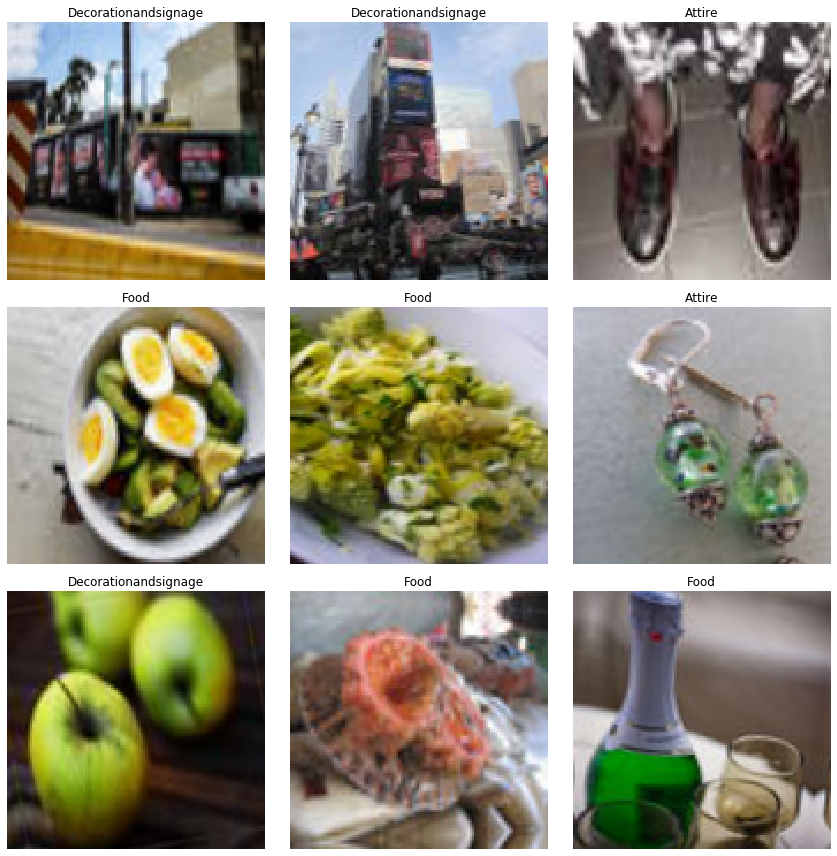

In [7]:
data.show_batch(3)

In [7]:
# defining classifier
learn = cnn_learner(data, models.resnet152, metrics=accuracy)

In [8]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

In [10]:
learn.load('stage-2-rn152')

Learner(data=ImageDataBunch;

Train: LabelList (4488 items)
x: ImageList
Image (3, 112, 112),Image (3, 112, 112),Image (3, 112, 112),Image (3, 112, 112),Image (3, 112, 112)
y: CategoryList
Food,Attire,Food,misc,Food
Path: dataset;

Valid: LabelList (1495 items)
x: ImageList
Image (3, 112, 112),Image (3, 112, 112),Image (3, 112, 112),Image (3, 112, 112),Image (3, 112, 112)
y: CategoryList
Attire,Decorationandsignage,Attire,Attire,misc
Path: dataset;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stat

In [11]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


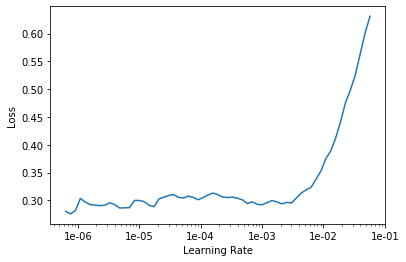

In [12]:
learn.recorder.plot()

In [13]:
lr = 1e-4

In [14]:
learn.fit_one_cycle(30, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.334373,0.574598,0.820736,00:54
1,0.331713,0.563782,0.828763,00:52
2,0.299568,0.552862,0.831438,00:52
3,0.306726,0.539818,0.832107,00:52
4,0.289393,0.529056,0.835451,00:53
5,0.280915,0.522466,0.835451,00:56
6,0.261731,0.517825,0.832107,00:55
7,0.251865,0.508435,0.838127,00:56
8,0.245136,0.497032,0.842140,00:55
9,0.243478,0.499375,0.835451,00:56


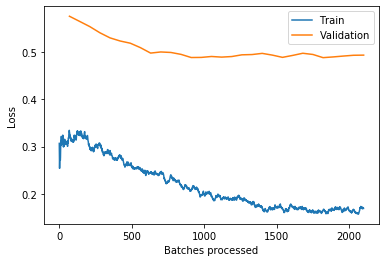

In [15]:
learn.recorder.plot_losses()

In [16]:
learn.save('stage-1-112-rn152')

## Interpretation

In [10]:
interp = ClassificationInterpretation.from_learner(learn)

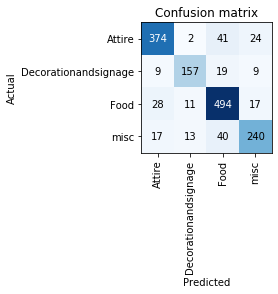

In [11]:
interp.plot_confusion_matrix()

## Fine tuning

In [9]:
learn.load('stage-1-112-rn152')

Learner(data=ImageDataBunch;

Train: LabelList (4488 items)
x: ImageList
Image (3, 112, 112),Image (3, 112, 112),Image (3, 112, 112),Image (3, 112, 112),Image (3, 112, 112)
y: CategoryList
Food,Attire,Food,misc,Food
Path: dataset;

Valid: LabelList (1495 items)
x: ImageList
Image (3, 112, 112),Image (3, 112, 112),Image (3, 112, 112),Image (3, 112, 112),Image (3, 112, 112)
y: CategoryList
Attire,Decorationandsignage,Attire,Attire,misc
Path: dataset;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stat

In [12]:
learn.unfreeze()

In [13]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


RuntimeError: CUDA out of memory. Tried to allocate 2.00 MiB (GPU 0; 3.95 GiB total capacity; 3.04 GiB already allocated; 5.81 MiB free; 78.88 MiB cached)

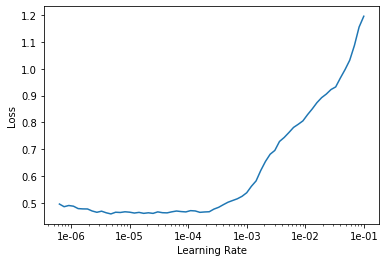

In [20]:
learn.recorder.plot()

In [21]:
new_lr = slice(lr/400, lr/4)

In [22]:
learn.fit_one_cycle(30, new_lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.469052,0.661354,0.752508,00:38
1,0.467342,0.654064,0.754515,00:40
2,0.475768,0.651348,0.751171,00:40
3,0.468788,0.661153,0.751839,00:40
4,0.452302,0.655630,0.754515,00:40
5,0.427218,0.632182,0.761204,00:39
6,0.408749,0.637370,0.752508,00:40
7,0.385904,0.629397,0.766555,00:40
8,0.358180,0.633636,0.763880,00:40
9,0.319118,0.644272,0.763880,00:40


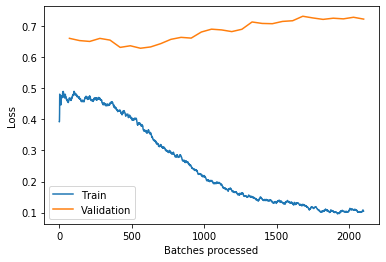

In [23]:
learn.recorder.plot_losses()

In [24]:
learn.save('stage-2-rn152')

In [19]:
learn.export()

## Inference

In [20]:
(path/'dataset/').ls()

[PosixPath('dataset/models'),
 PosixPath('dataset/best_27.pkl'),
 PosixPath('dataset/test.csv'),
 PosixPath('dataset/Train Images'),
 PosixPath('dataset/export.pkl'),
 PosixPath('dataset/train.csv'),
 PosixPath('dataset/Test Images')]

In [21]:
test_ds = ImageList.from_csv(path/'dataset/', 'test.csv', folder='Test Images')

In [22]:
# creating new classifier to add test data
learn = load_learner(path/'dataset/', test=test_ds)

In [23]:
# prediction on testset
pred, y = learn.get_preds(ds_type=DatasetType.Test)

In [24]:
pred[:3]

tensor([[8.2648e-03, 2.2260e-04, 9.9088e-01, 6.2810e-04],
        [1.3647e-03, 1.5557e-03, 9.9204e-01, 5.0359e-03],
        [1.7588e-03, 3.4217e-04, 9.9161e-01, 6.2921e-03]])

In [25]:
# acquiring labels
pred_label = [learn.data.classes[np.argmax(p)] for p in pred]

In [26]:
pred_label[:3]

['Food', 'Food', 'Food']

In [27]:
# acquiring filenames
fnames = [f.split('/')[-1] for f in learn.data.test_ds.items]

In [28]:
fnames[:3]

['image6245.jpg', 'image10409.jpg', 'image8692.jpg']

In [29]:
# creating new csv using pandas DF
df = pd.DataFrame({'Image':fnames, 'Class':pred_label}, columns=['Image', 'Class'])

In [30]:
df.to_csv('submission_28.csv', index=False)

In [31]:
df2 = pd.read_csv('submission_28.csv')
df2.head()

,Image,Class
0,image6245.jpg,Food
1,image10409.jpg,Food
2,image8692.jpg,Food
3,image10517.jpg,Food
4,image2580.jpg,Attire
